<h1>Рекомендательные системы, проект</h1>
<img src="titlePic.png">
<h2>amazon-fine-food-reviews</h2>
<h5>Авторы: Адаменко Павел, Шведов Денис, Пестова Анастасия</h5>

<p id='title'></p>
<center><h2>     Оглавление </h2></center>
<a href="#aa">1.1 Описание датасета </a>
<p></p>
<a href = '#ab'>1.2 Анализ датасета  </a>
<p></p>
<a href = '#deloutliers'>1.3 Очистка датасета  </a>
<p></p>
<a href = '#visual'>1.4 Визуализация  </a>
<p></p>
<a href = '#ac'>1.5 Выводы </a>
<p></p>
<p>-</p>
<a href = '#ba'>2.1 Постановка задачи  </a>
<p></p>
<a href = '#bb'>2.2 Метрики качества  </a>
<p></p>
<p>-</p>
<a href = '#ca'>3.1 Модели и результаты  </a>
<p></p>
<a href = '#cb'>3.2 Random Forest Regressor  </a>
<p></p>
<a href = '#cc'>3.3 Random Forest Classifier  </a>
<p></p>
<a href = '#cd'>3.4 XGB Classifier  </a>
<p></p>
<a href = '#ce'>3.5 XGB Regressor  </a>
<p></p>
<a href = '#cf'>3.6 SVD  </a>
<p></p>
<a href = '#cg'>3.7 Matrix Factorization  </a>
<p></p>
<a href = '#ch'>3.8 Probabilistic Matrix Factorization  </a>
<p></p>
<p>-</p>
<a href = '#da'>4.1 Таблица результатов  </a>
<p></p>
<a href = '#db'>4.2 Итоги  </a>
<p></p>

<p id='aa'></p>
### Источник датасета
https://www.kaggle.com/snap/amazon-fine-food-reviews


### Описание датасета 
Датасет состоит из обзоров продуктов питания от Amazon. Данные охватывают период более 10 лет, включая все \~ 500 000 обзоров до октября 2012 года. Обзоры включают в себя информацию о продуктах и пользователях, рейтинги и комментарии к товарам. Датасет также включает в себя отзывы о всех других категорий Amazon.

### Данные включают
- Отзывы с октября 1999 до октября 2012
- 568,454 отзывов
- 256,059 пользователи
- 74,258 товаров
- 260 пользователей с 50 отзывами и более
   

### Данные колонок 
- Id - уникальный идентификатор
- ProductId - уникальный идентификатор каждого продукта
- UserId - уникальный идентификатор каждого пользователя
- ProfileName - логин профиля
- HelpfulnessNumerator - количество пользователей, которые посчитали этот отзыв полезным
- HelpfulnessDenominator - количество пользователей, которые отреагировали на этот отзыв
- Score - рейтинг от 1 до 5 (1 - худшее, 5 - лучшее)
- Time -  временная отметка
- Summary - основные выводы отзыва
- Text - весь текст отзыва

<a href = '#title'>К оглавлению</a>


##### Загружаем библиотеки

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from xgboost import XGBClassifier
%matplotlib inline 

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error

data_folder = "../amazon-fine-food-reviews/Reviews.csv"

<p id = 'ab'> </p>
### Анализ датасета
<a href='#title'>К оглавлению</a>

In [2]:
df = pd.read_csv(data_folder)
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Статистика по исходному датасету, информация по колонкам

In [3]:
df.shape

(568454, 10)

In [4]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


<p id = 'deloutliers'> <p>
### Подготовим данные
Уберем все товары и пользователей менее чем с 8 записями
    
    
<a href='#title'>К оглавлению</a>

In [5]:
M = 8

In [6]:
def data_clean(df, feature, m):
    count = df[feature].value_counts()
    df = df[df[feature].isin(count[count > m].index)]
    return df

In [7]:
df['datetime'] = pd.to_datetime(df.Time, unit='s')

features = ['ProductId', 'UserId']
m = 8
#Пользователей и предметы с менее чем 8 оценками не берем
def data_raw(df, features, m):
    print(df.shape)
    fil = df.ProductId.value_counts()
    fil2 = df.UserId.value_counts()
    df['#Proudcts'] = df.ProductId.apply(lambda x: fil[x])
    df['#Users'] = df.UserId.apply(lambda x: fil2[x])
    while (df.ProductId.value_counts(ascending=True)[0]) < m \
        or (df.UserId.value_counts(ascending=True)[0] < m):
        print(df.shape)
        df = data_clean(df, features[0], m)
        df = data_clean(df, features[1], m)
    return df
        
raw_data = data_raw(df, features, m)
raw_data['uid'] = pd.factorize(raw_data['UserId'])[0]
raw_data['pid'] = pd.factorize(raw_data['ProductId'])[0]

(568454, 11)
(568454, 13)
(124413, 13)
(93782, 13)
(90097, 13)


In [8]:
#Удалим повторяющиеся отзывы
raw_data['uniq_id'] = [str(k)+'|'+str(v) for k,v in raw_data[['uid', 'pid']].get_values()]
raw_data = raw_data.sort_values(['uniq_id', 'Score']).drop_duplicates(subset=['uniq_id'], keep='last')
del raw_data['uniq_id']
print(raw_data.shape)

(83502, 15)


In [9]:
raw_data.shape

(83502, 15)

<h4> У нас осталось примерно 83502 объектов (15.8% от исходной выборки) </h4>

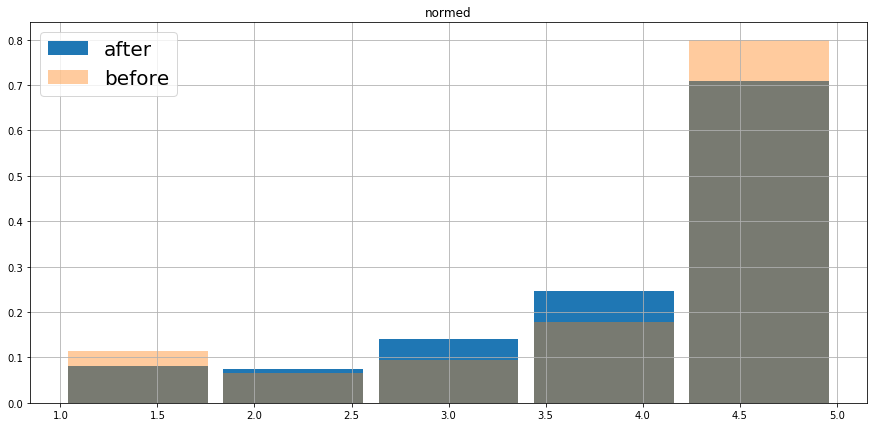

In [10]:
plt.figure(figsize = (15, 7))
plt.title('normed')
raw_data['Score'].hist(bins = 5, rwidth = 0.9, normed = True, label = 'after')
df['Score'].hist(bins = 5, rwidth = 0.9,alpha = 0.4, normed = True, label = 'before')
plt.legend(fontsize = 20)
plt.show()

In [11]:
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,datetime,#Proudcts,#Users,uid,pid
589,590,B000G6RYNE,A2NO1TXXS9T0EE,BruteNStones,1,1,5,1327536000,Amazing Service,"Package arrived DOUBLE boxed, wrapped, and the...",2012-01-26,217,44,0,0
403378,403379,B0058AMY5G,A2NO1TXXS9T0EE,BruteNStones,1,1,5,1327536000,Amazing Service,"Package arrived DOUBLE boxed, wrapped, and the...",2012-01-26,217,44,0,1076
410374,410375,B000LKVDLO,A2NO1TXXS9T0EE,BruteNStones,0,1,2,1335398400,Got sick,Extremely similar to Oreo's but the fiber cont...,2012-04-26,54,44,0,1093
413862,413863,B0026KPDG8,A2NO1TXXS9T0EE,BruteNStones,2,2,4,1312761600,"Great, tons of salt though.",If you suffer high blood pressure these MAY ca...,2011-08-08,564,44,0,1104
466598,466599,B000G6O2QG,A2NO1TXXS9T0EE,BruteNStones,1,1,5,1327536000,Amazing Service,"Package arrived DOUBLE boxed, wrapped, and the...",2012-01-26,218,44,0,1235


In [12]:
#Введем шкалирование признаков
sc = MinMaxScaler()
raw_data['time'] = sc.fit_transform(raw_data['Time'].values.reshape(-1,1))
raw_data['nuser'] = sc.fit_transform(raw_data['#Users'].values.reshape(-1,1))
raw_data['nproduct'] = sc.fit_transform(raw_data['#Proudcts'].values.reshape(-1,1))

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
ind_train, ind_test, _, _ = train_test_split(raw_data.index, raw_data, test_size=0.3)

raw_data['OOS'] = False
raw_data.loc[ind_test.tolist(), 'OOS'] = True

In [14]:
data = raw_data.copy()
X_train = data[data['OOS'] == False]
X_test = data[data['OOS']  == True]

total_p, total_u = data['pid'].unique().shape[0], data['uid'].unique().shape[0]

def create_table_from_dataframe(df):
    res = np.zeros([total_u,total_p])
    for u, p, s in df[['uid', 'pid', 'Score']].get_values():
        res[u][p] = s
    return res

In [15]:
df.shape

(568454, 13)

In [16]:
data.shape

(83502, 19)

<p id='visual'></p>
### Визуализация
#### Частотное распределение оценок товаров
<a href='#title'>К оглавлению</a>

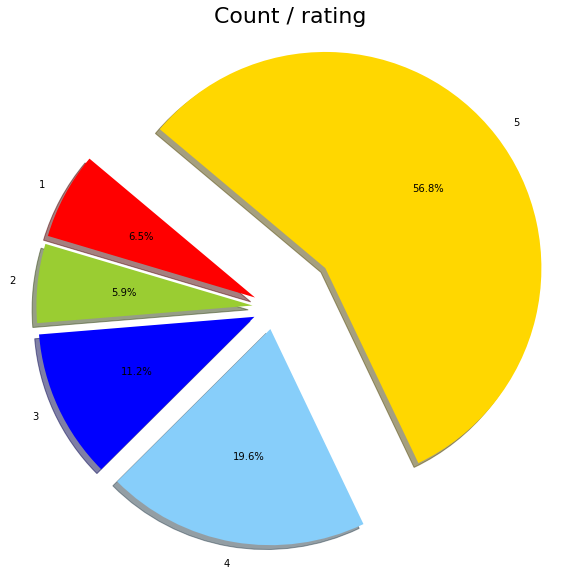

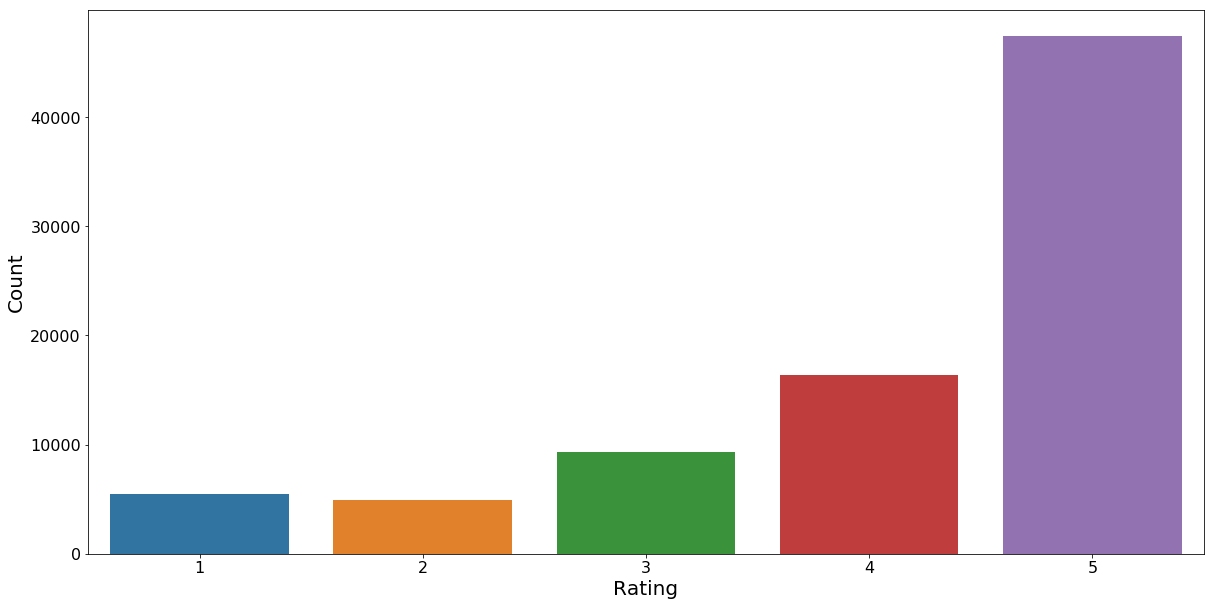

In [17]:
# Data to plot
plt.figure(figsize = (10, 10))
plt.title('Count / rating', fontsize = 22)
labels = list(range(1,6))
dct = dict(data['Score'].value_counts())
sizes  = [dct[k]/sum(list(dct.values())) for k in labels]
colors = ['red', 'yellowgreen', 'blue', 'lightskyblue', 'gold']
explode = (0.1, 0.1, 0.1, 0.1, 0.3)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

plt.figure(figsize = (20, 10))
sns.countplot(x='Score', data=data)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Rating', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()


### Анализ положительных и негативных оценок

In [18]:
new_DF = data[['UserId','HelpfulnessNumerator','HelpfulnessDenominator', 'Summary', 'Text','Score']].copy()

new_DF["Sentiment"] = new_DF["Score"].apply(lambda score: "positive" if score > 3 else \
                                              ("negative" if score < 3 else "not defined"))

new_DF.loc[new_DF.HelpfulnessDenominator == 0, 'Usefulness'] = ["useless"]
new_DF.shape

(83502, 8)

<p id = "pidr"> </p>

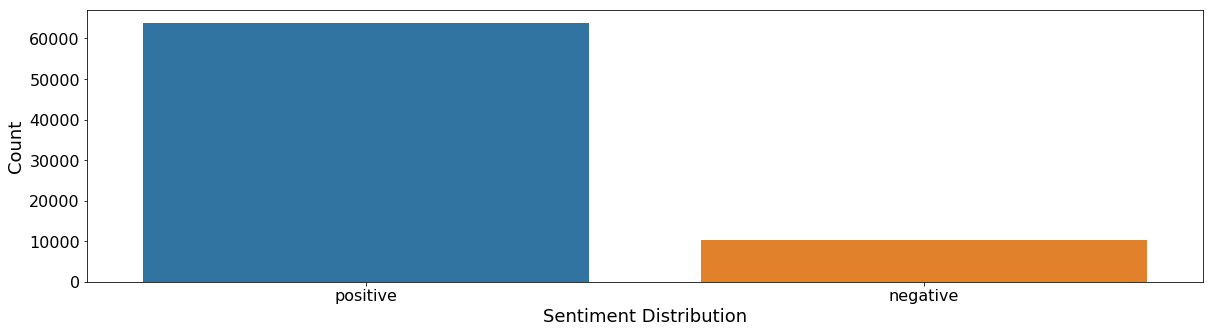

positive       63818
negative       10364
not defined     9320
Name: Sentiment, dtype: int64


In [56]:
plt.figure(figsize = (20, 5))

sns.countplot(x='Sentiment', order=["positive", "negative"], data=new_DF)
plt.xlabel('Sentiment Distribution', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()
print(new_DF.Sentiment.value_counts())

### Посмотрим самые часто употребляемые слова в положительных и отрицательных отзывах

In [20]:
def plot_Cloud(wordCloud, title = ''):
    plt.figure( figsize=(20,10))
    plt.title(title, fontsize = 30)
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

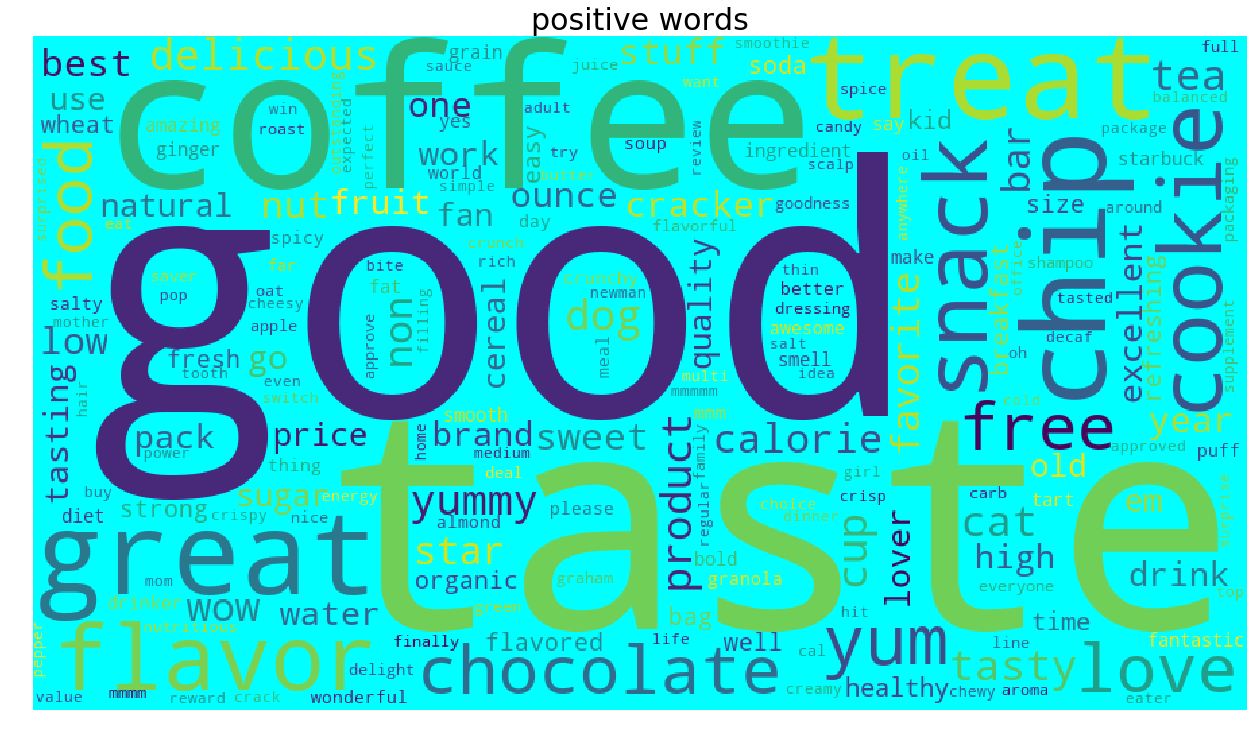

In [21]:
def foo(text, fast = True):
    text = str(text).lower()
    text = text.replace('  ',' ').replace('  ',' ').replace(' no ', ' no_').replace(' not ',' not_')
    if fast:
        return text
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

text_pos = ' '.join(set(' '.join(new_DF[new_DF['Score'] == 5]['Summary'].apply(foo)).split(' ')))
wc_pos = WordCloud(width=900, height=500, background_color="cyan").generate(text_pos)
                    
plot_Cloud(wc_pos, title = 'positive words')

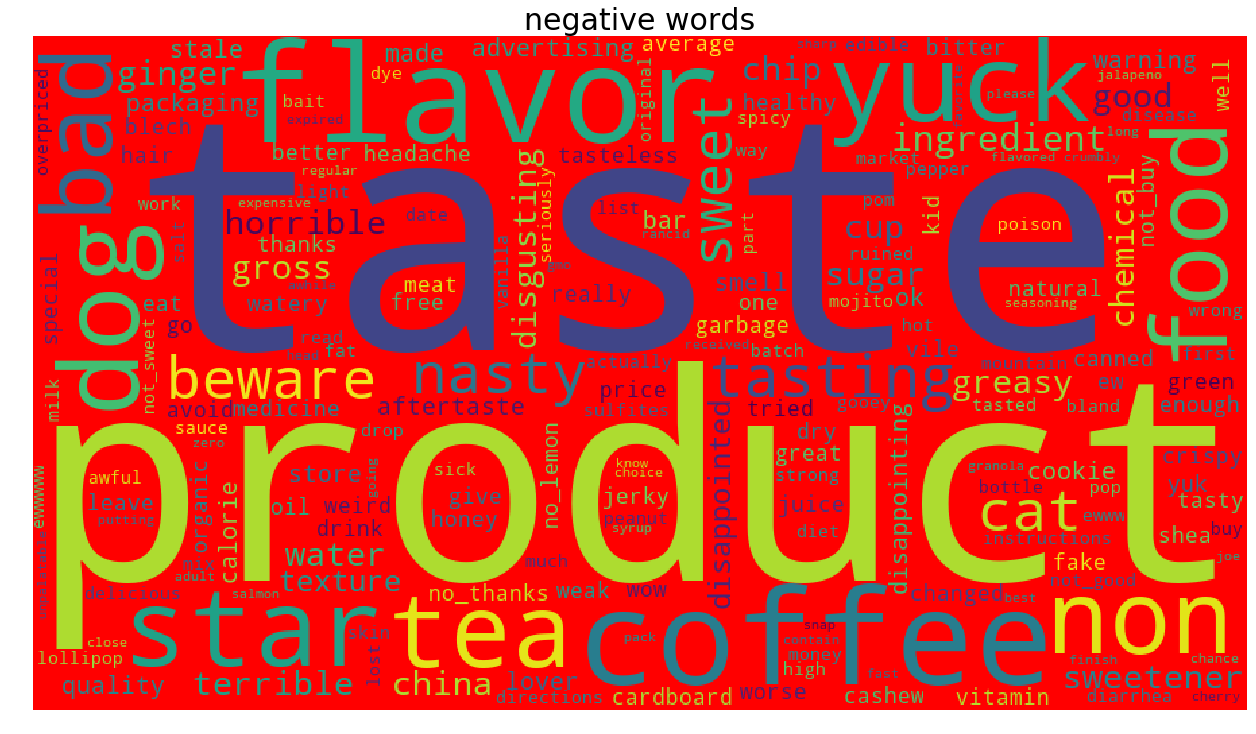

In [22]:
text_neg = ' '.join(set(' '.join(new_DF[new_DF['Score'] == 1]['Summary'].apply(foo)).split(' ')))
wc_neg = WordCloud(width=900, height=500, background_color="red").generate(text_neg)
plot_Cloud(wc_neg, title = 'negative words')

### Анализ полезных и бесполезных отзывов

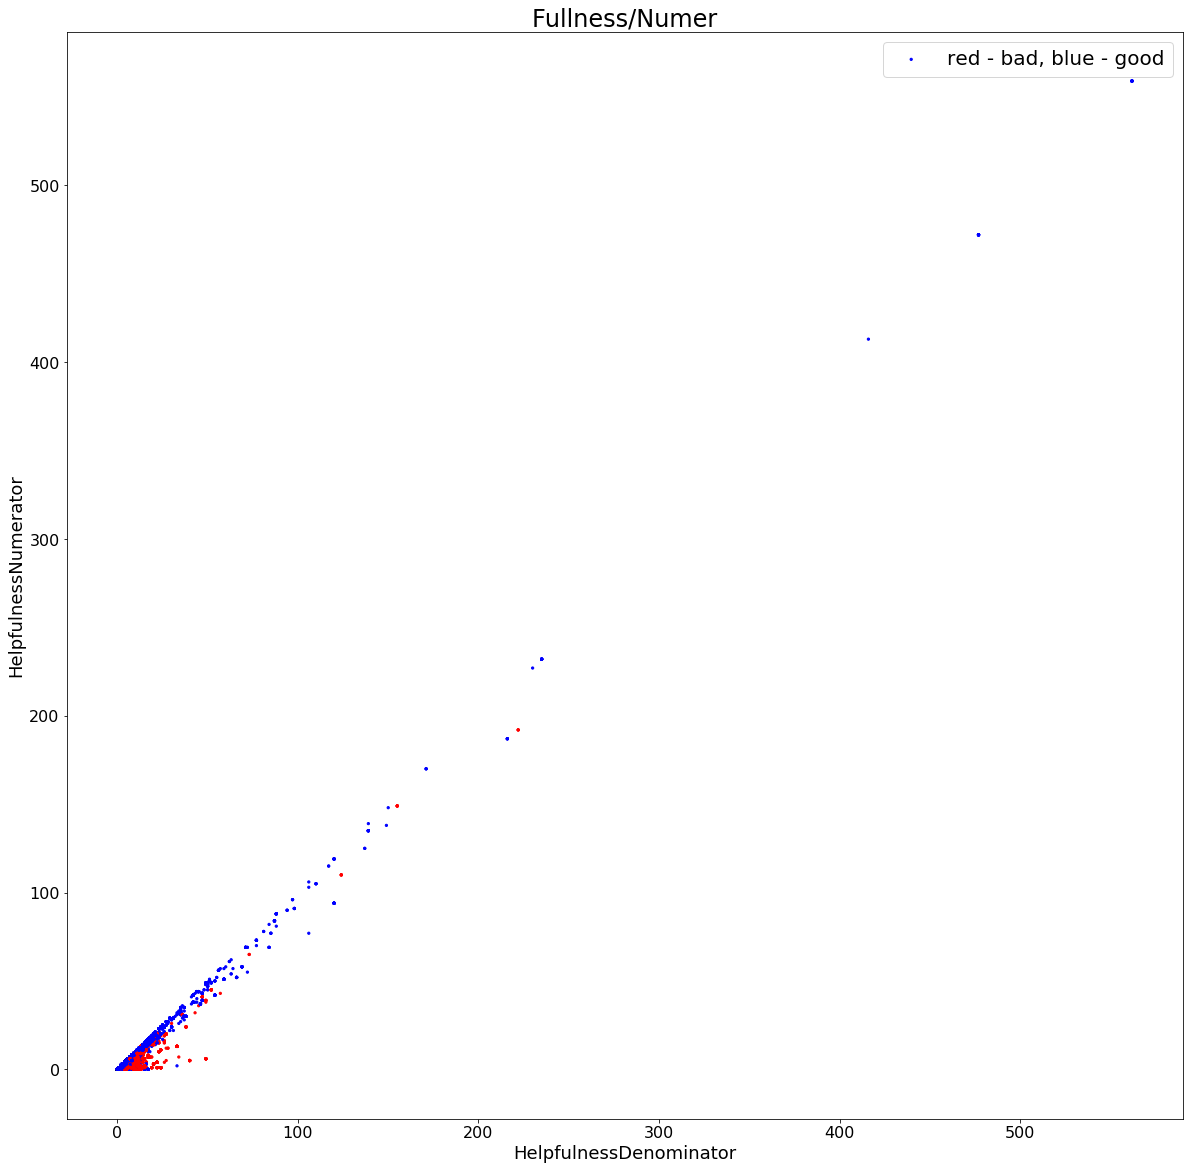

In [23]:
def get_color(s):
    if s < 2.5:
        return 'red'
    else:
        return 'blue'

plt.figure(figsize = (20, 20))
plt.title('Fullness/Numer', fontsize = 24)
plt.scatter(new_DF['HelpfulnessDenominator'], new_DF['HelpfulnessNumerator'], color = new_DF['Score'].apply(get_color), s = 5)
plt.ylabel('HelpfulnessNumerator', fontsize = 18)
plt.legend(['red - bad, blue - good'], fontsize = 20)
plt.xlabel('HelpfulnessDenominator', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [24]:
new_DF["Usefulness"] = (new_DF["HelpfulnessNumerator"]/new_DF["HelpfulnessDenominator"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                        n <= 0.75 else "useless")))

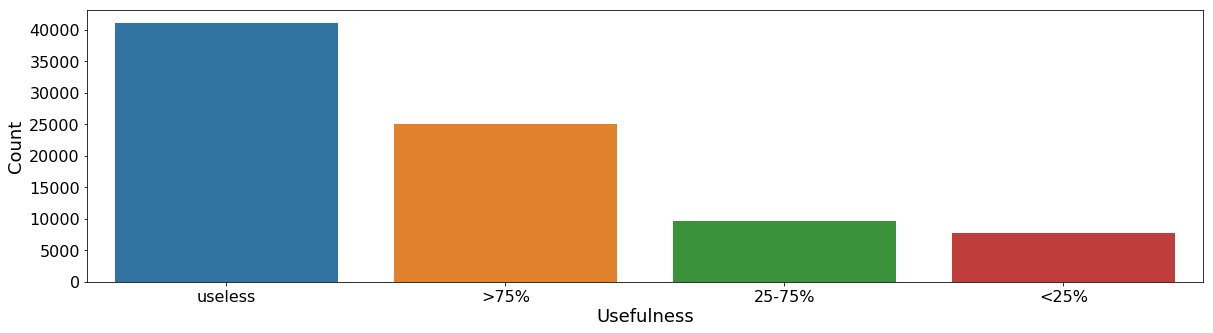

In [25]:
plt.figure(figsize = (20, 5))
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=new_DF)
plt.xlabel('Usefulness', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

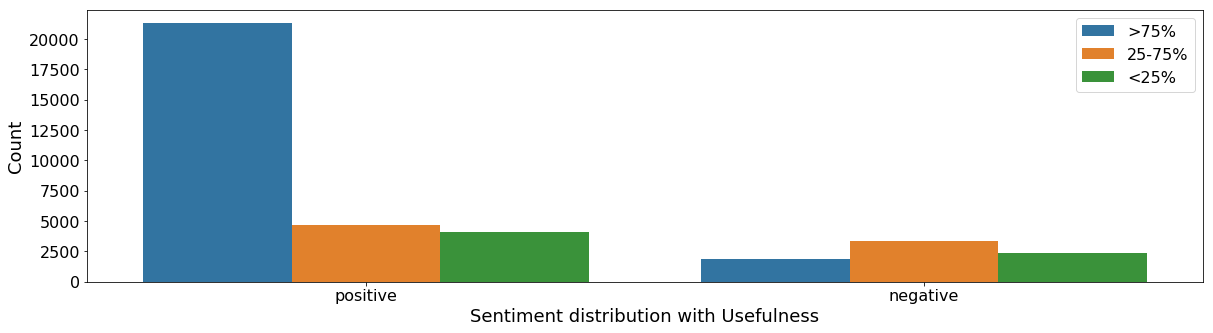

In [26]:
plt.figure(figsize = (20, 5))
sns.countplot(x='Sentiment', hue='Usefulness', order=["positive", "negative"], \
              hue_order=['>75%', '25-75%', '<25%'], data=new_DF)
plt.xlabel('Sentiment distribution with Usefulness', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

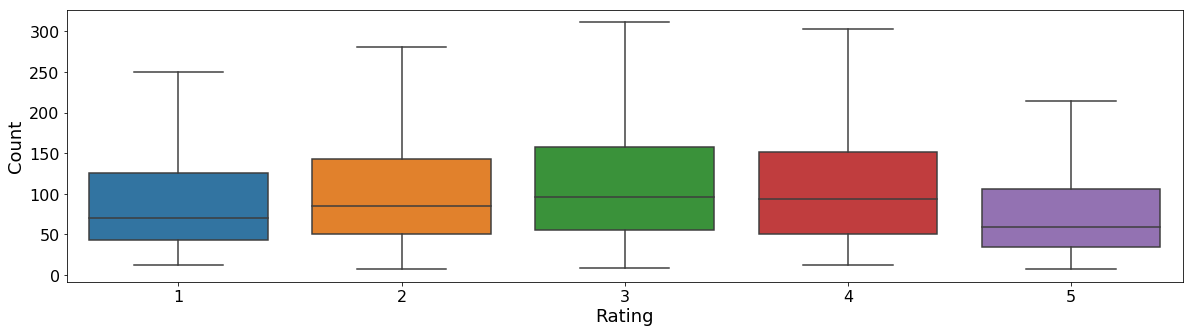

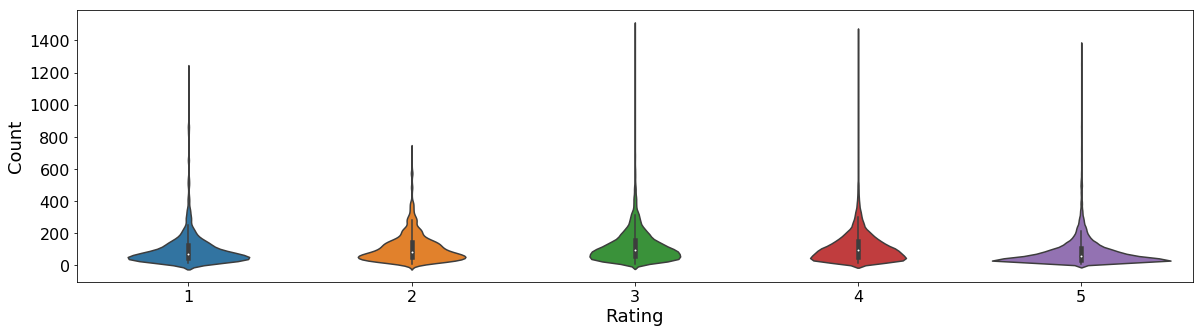

In [27]:
plt.figure(figsize = (20, 5))
new_DF["text_word_count"] = new_DF["Text"].apply(lambda text: len(text.split()))
sns.boxplot(x='Score',y='text_word_count', data=new_DF, showfliers=False)
plt.xlabel('Rating', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

plt.figure(figsize = (20, 5))
new_DF["text_word_count"] = new_DF["Text"].apply(lambda text: len(text.split()))
sns.violinplot(x='Score',y='text_word_count', data=new_DF, showfliers=False)
plt.xlabel('Rating', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

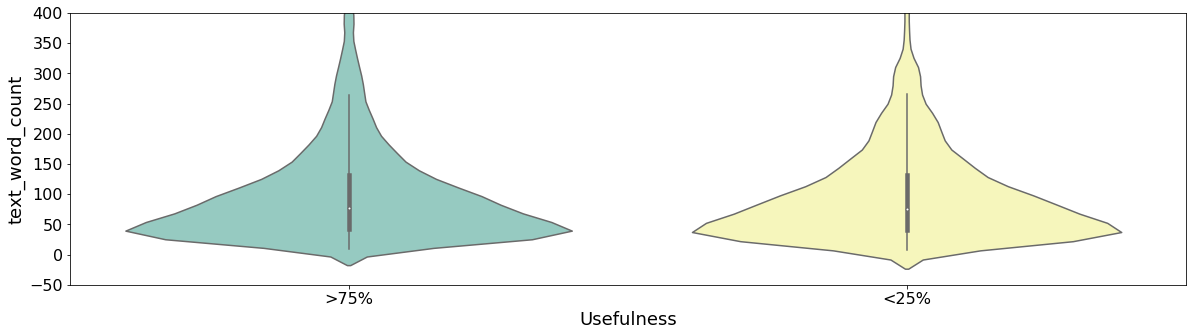

In [28]:
plt.figure(figsize = (20, 5))

sns.violinplot(x='Usefulness', y='text_word_count', order=[">75%", "<25%"], \
               data=new_DF, palette='Set3')

plt.xlabel('Usefulness', fontsize = 18)
plt.ylabel('text_word_count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(-50, 400)
plt.show()

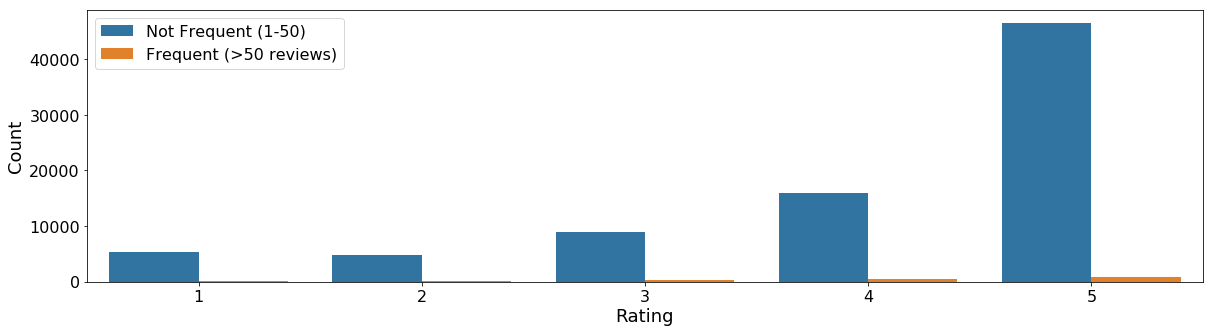

In [29]:
plt.figure(figsize = (20, 5))

x = new_DF.UserId.value_counts()
x.to_dict()
new_DF["reviewer_freq"] = new_DF["UserId"].apply(lambda counts: "Frequent (>50 reviews)" \
                                                                 if x[counts]>50 else "Not Frequent (1-50)")
ax = sns.countplot(x='Score', hue='reviewer_freq', data=new_DF)
ax.set_xlabel('Rating')

plt.xlabel('Rating', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

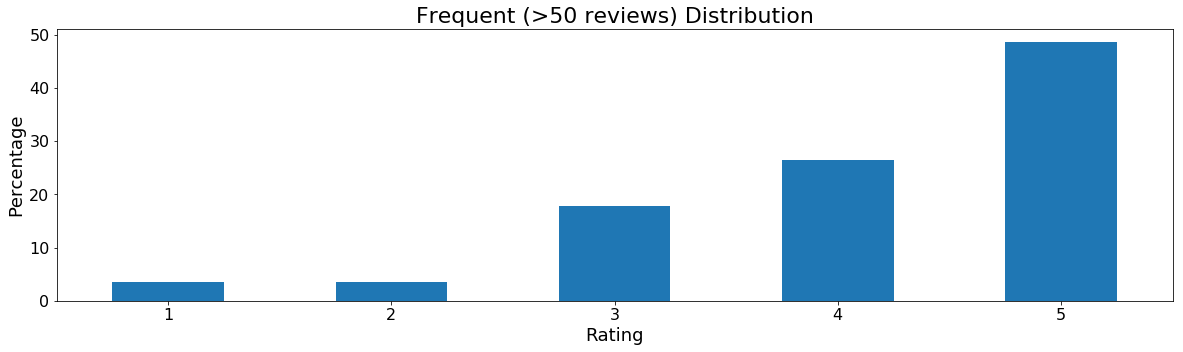

In [30]:
plt.figure(figsize = (20, 5))

y = new_DF[new_DF.reviewer_freq=="Frequent (>50 reviews)"].Score.value_counts()
z = new_DF[new_DF.reviewer_freq=="Not Frequent (1-50)"].Score.value_counts()

tot_y = y.sum()

y = (y/tot_y)*100

tot_z = z.sum()

z = (z/tot_z)*100

y[::-1].plot(kind="bar", rot=0)
plt.xlabel("Rating", fontsize = 18)
plt.ylabel("Percentage", fontsize = 18)
plt.title("Frequent (>50 reviews) Distribution", fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# plt.legend()
plt.show()

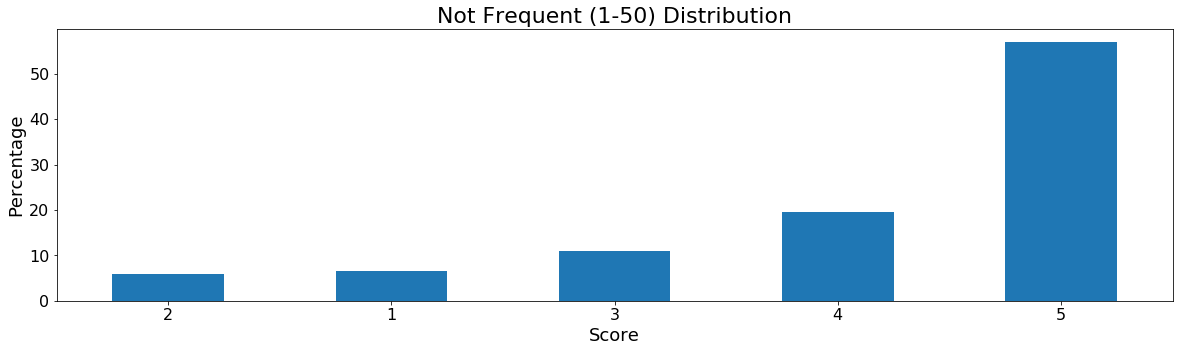

In [31]:
plt.figure(figsize = (20, 5))

z[::-1].plot(kind="bar", rot=0)
plt.xlabel("Score", fontsize = 18)
plt.ylabel("Percentage", fontsize = 18)
plt.title("Not Frequent (1-50) Distribution", fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

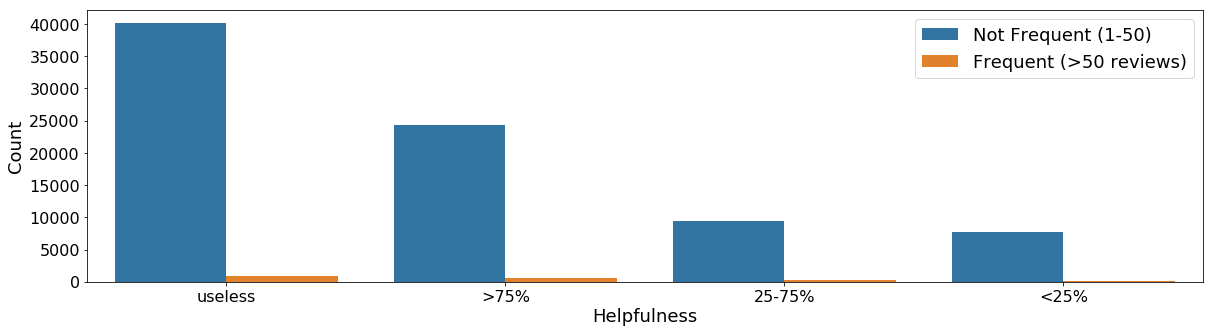

In [32]:
plt.figure(figsize = (20, 5))


sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], \
              hue='reviewer_freq', data=new_DF)

plt.xlabel('Helpfulness', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 18)

plt.show()

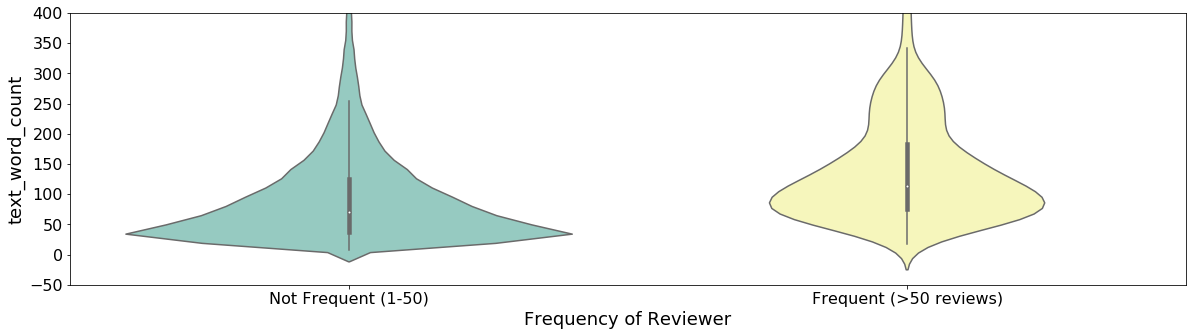

In [33]:
plt.figure(figsize = (20, 5))


sns.violinplot(x='reviewer_freq', y='text_word_count',  \
               data=new_DF, palette='Set3')

plt.ylabel('text_word_count', fontsize = 18)
plt.xlabel('Frequency of Reviewer', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 18)

plt.ylim(-50, 400)
plt.show()

In [57]:
print(len(raw_data['Score']), sum(raw_data['Score']>3), sum(raw_data['Score']>3)/len(raw_data['Score']))

83502 63818 0.7642691193025317


<p id='ac'> </p>
### Выводы после краткого анализа данных 

1 Много пропущенных значений в колонках "Summary" and "ProfileName"

2 Распределение классов несбалансированно (отзывов с рейтингом 4/5 порядка 75%)

3 Чаще всего положительные отзывы 
    - короче
    - их находят более полезными
    
4 Рецензенты с частыми отзывами
    - пишут отзывы длиннее
    - их отзывы считаются более полезными
    
<a href='#title'>К оглавлению</a>

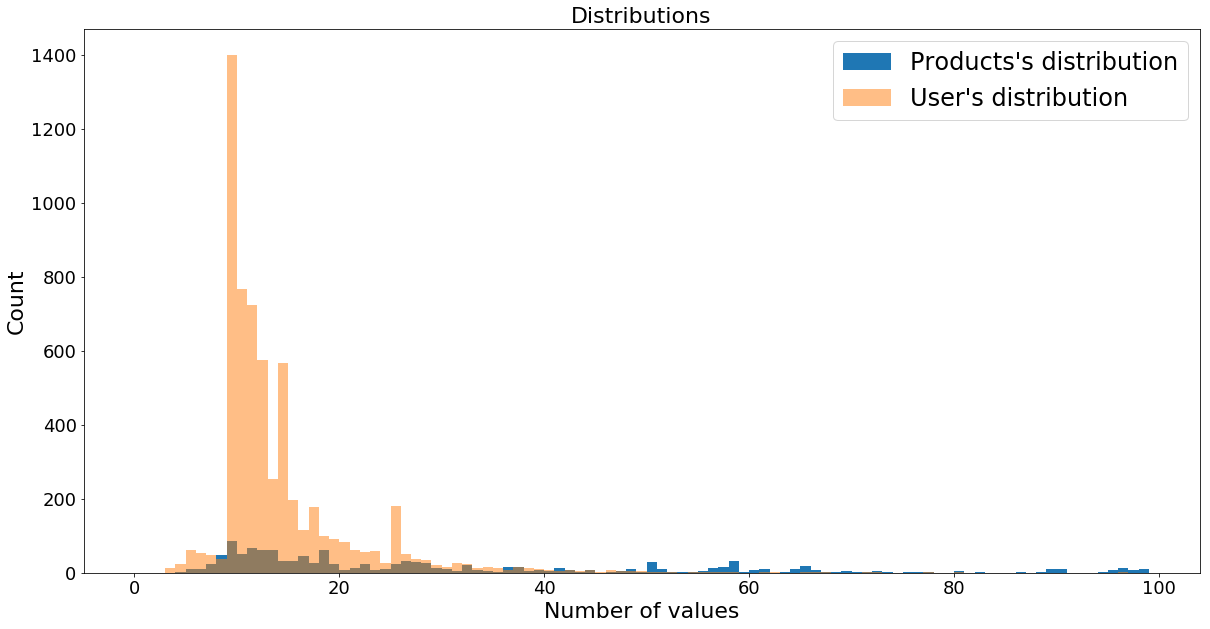

In [35]:
plt.figure(figsize = (20, 10))
plt.title('Distributions', fontsize = 22)
plt.hist(list(dict(data['ProductId'].value_counts()).values()), bins = range(100), 
         label = "Products's distribution")

plt.hist(list(dict(data['UserId'].value_counts()).values()), bins = range(100), alpha = 0.5, 
         label = "User's distribution")


plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.ylabel('Count', fontsize = 22)
plt.xlabel('Number of values', fontsize = 22)

plt.legend(fontsize = 24)
plt.show()

<p id = 'ba'></p>
### Постановка задачи
    На данном предобработанном датасете, обучим различные модели:
         - RandomForest
         - RandomForestClassifier
         - XGBRegressor
         - XGBClassifier
         
         - SVD
         - MAtrixFactorization
         - Probability Matrix Factorization
         
    (во всех моделях, будем использовать только матрицу признаокв (user-product-score))

    Для сравнения качества работы моделей будем использовать метрику R2
<a href='#title'>К оглавлению</a>

##### Чему соответствует R2 = 0 ?

In [36]:
mean_prediction = X_train['Score'].mean()
MSE_train = mean_squared_error(X_train['Score'], [mean_prediction]*len(X_train))

mean_prediction = X_test['Score'].mean()
MSE_test = mean_squared_error(X_test['Score'], [mean_prediction]*len(X_test))

print('R2 = 1 - MSE(y, y_predict)')
print('         --------------------------')
print('         MSE(y , y_mean_prediction)')
print()
print('  Train :\tR2 = 0  <=>  MSE = %2.4f'%(MSE_train))

print('  Test  :\tR2 = 0  <=>  MSE = %2.4f'%(MSE_test))

R2 = 1 - MSE(y, y_predict)
         --------------------------
         MSE(y , y_mean_prediction)

  Train :	R2 = 0  <=>  MSE = 1.4782
  Test  :	R2 = 0  <=>  MSE = 1.4875


<p id = 'bb'></p>
### Метрики качества
<a href='#title'>К оглавлению</a>

Функция для отрисовки матрицы ошибок

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Функция для подсчета метрик

In [38]:
def print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = None):
    """
        y_train, t_train, t_test, t_train - list of metrics
        
    """
    def foo(x):
        return str(max(min(int(x), 5), 1))
    
    temp = np.mean(y_train) 
    trainMSE = mean_squared_error(y_train,[temp for i in y_train])
                                  
    temp = np.mean(y_test) 
    testMSE = mean_squared_error(y_test,[temp for i in y_test])

    print("Train")
    print('\tMSE(mean)        %2.4F'%trainMSE)
    print('\tMSE(prediction)  %2.4F'%mean_squared_error(y_train,t_train))
    print('\tR2(prediction)    %2.4F'%r2_score(y_train,t_train))
    
    
    if not binary:
        print('\tconfusion matrix')
        M = confusion_matrix([foo(i) for i in y_train], [foo(i) for i in t_train])
        print(str(M).replace('\n', '\t\n'))
        plot_confusion_matrix(M, classes=['1', '2', '3', '4', '5'], normalize=True, title='binary')
        plt.show()
    else:   
        print('\tconfusion matrix false')
        M = confusion_matrix([i>3 for i in y_train], [i>3 for i in t_train])
        plot_confusion_matrix(M, classes=['not','recommand'], normalize=True, title='binary')
        print(str(M).replace('\n', '\t\n'))
        plt.show()
    
    print("\nTest")
    print('\tMSE(mean)        %2.4F'%testMSE)
    print('\tMSE(prediction)  %2.4F'%mean_squared_error(y_test,t_test))
    print('\tR2(prediction)    %2.4F'%r2_score(y_test,t_test))
    
    
    if not binary:
        print('\tconfusion matrix')
        M = confusion_matrix([foo(i) for i in y_test], [foo(i) for i in t_test])
        print(str(M).replace('\n', '\t\n'))
        plot_confusion_matrix(M, classes=['1', '2', '3', '4', '5'], normalize=True, title='binary')
        plt.show()
    else:   
        print('\tconfusion matrix false')
        M = confusion_matrix([i>3 for i in y_test], [i>3 for i in t_test])
        plot_confusion_matrix(M, classes=['not','recommand'], normalize=True, title='binary')
        print(str(M).replace('\n', '\t\n'))
        plt.show()

    if name is not None:
        results_final[name] = {'r2(train)' : r2_score(y_train,t_train),
                               'r2(test)'  : r2_score(y_test,t_test)
                              }

In [39]:
results_final = {}

<p id = 'ca'></p>
### Модели и результаты
<a href='#title'>К оглавлению</a>


<p id='cb'></p>
### Random Forest Regressor
<a href='#title'>К оглавлению</a>


Сначала мы попытаемся использовать rfr для построения простой модели. Идея очень проста, просто используем алгоритм поиска скрытой оценки одной пары пользователя и товара. Мы можем видеть, что MSE не очень большое, и confusion matrix является вполне допустимой.
<img src="rf.jpg">
В этой части, X - закодированные UserId и ProductId.Также добавлены MinMaxScaler времени, количества товаров и пользователей. y - выставленная оценка (score).

Но недостаток очень очевиден: на отложенной выборке MSE равен 0.32, а на обучающей -- 0.07, что говорит о переобучении.

Train
	MSE(mean)        1.4782
	MSE(prediction)  0.1077
	R2(prediction)    0.9271
	confusion matrix
[[ 3347   384    64     0     0]	
 [  112  2947   366    11     0]	
 [    0   546  5785   137     0]	
 [    0    40  3080  8339     0]	
 [    1    10   405  9477 23400]]
Normalized confusion matrix
[[8.81949934e-01 1.01185771e-01 1.68642951e-02 0.00000000e+00
  0.00000000e+00]
 [3.25960419e-02 8.57683353e-01 1.06519208e-01 3.20139697e-03
  0.00000000e+00]
 [0.00000000e+00 8.44155844e-02 8.94403216e-01 2.11811998e-02
  0.00000000e+00]
 [0.00000000e+00 3.49070600e-03 2.68784362e-01 7.27724932e-01
  0.00000000e+00]
 [3.00363440e-05 3.00363440e-04 1.21647193e-02 2.84654432e-01
  7.02850449e-01]]


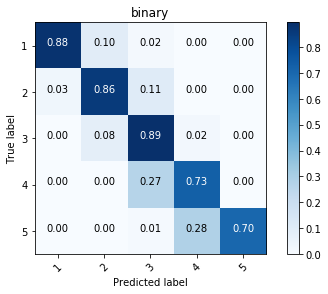


Test
	MSE(mean)        1.4875
	MSE(prediction)  0.6395
	R2(prediction)    0.5701
	confusion matrix
[[1156  137  169  154   24]	
 [  41  775  364  276   37]	
 [  28  248 1739  758   79]	
 [  29  259 1373 3125  144]	
 [  38  243 1188 4385 8282]]
Normalized confusion matrix
[[0.70487805 0.08353659 0.10304878 0.09390244 0.01463415]
 [0.02746149 0.51908908 0.24380442 0.18486269 0.02478232]
 [0.00981767 0.08695652 0.60974755 0.2657784  0.02769986]
 [0.00588235 0.0525355  0.27849899 0.63387424 0.02920892]
 [0.00268817 0.01719015 0.08404075 0.31020091 0.58588002]]


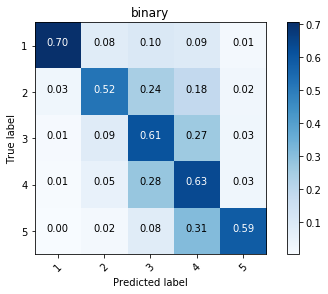

In [40]:
features = ['uid','pid']#,'time','nuser','nproduct']
y_train = X_train['Score'].get_values()
y_test  = X_test['Score'].get_values()

model = RandomForestRegressor()
model.fit(X_train[features], X_train['Score'])


t_train = model.predict(X_train[features])
t_test  = model.predict(X_test[features])

print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'RF regressor')

<p id='cc'></p>
### Random Forest Classifier
<a href='#title'>К оглавлению</a>


По сути, Random Forest является композицией (ансамблем) множества решающих деревьев, что позволяет снизить проблему переобучения и повысить точность в сравнении с одним деревом. Прогноз получается в результате агрегирования ответов множества деревьев. Тренировка деревьев происходит независимо друг от друга (на разных подмножествах), что не просто решает проблему построения одинаковых деревьев на одном и том же наборе данных, но и делает этот алгоритм весьма удобным для применения в системах распределённых вычислений. 

Train
	MSE(mean)        1.4782
	MSE(prediction)  0.1262
	R2(prediction)    0.9146
	confusion matrix
[[ 3660    10    13    23    89]	
 [   29  3250    21    35   101]	
 [   39    38  6151    68   172]	
 [   21    39   114 10970   315]	
 [   76    72   149   400 32596]]
Normalized confusion matrix
[[0.96442688 0.00263505 0.00342556 0.00606061 0.02345191]
 [0.00844005 0.94586729 0.00611176 0.01018626 0.02939464]
 [0.00602968 0.00587508 0.95098949 0.0105133  0.02659246]
 [0.00183262 0.00340344 0.00994851 0.95732612 0.02748931]
 [0.00228276 0.00216262 0.00447542 0.01201454 0.97906467]]


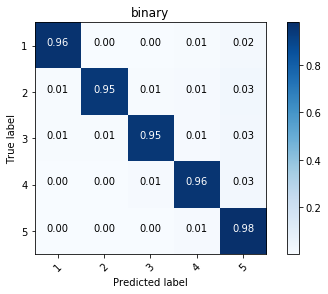


Test
	MSE(mean)        1.4875
	MSE(prediction)  2.0133
	R2(prediction)    -0.3534
	confusion matrix
[[ 548  125  167  226  574]	
 [ 142  175  225  289  662]	
 [ 218  210  513  698 1213]	
 [ 208  255  672 1373 2422]	
 [ 456  528 1022 2188 9942]]
Normalized confusion matrix
[[0.33414634 0.07621951 0.10182927 0.13780488 0.35      ]
 [0.09511052 0.11721366 0.15070328 0.19356999 0.44340255]
 [0.07643759 0.07363254 0.17987377 0.24474053 0.42531557]
 [0.04219067 0.05172414 0.13630832 0.27849899 0.49127789]
 [0.03225806 0.03735144 0.07229768 0.15478212 0.7033107 ]]


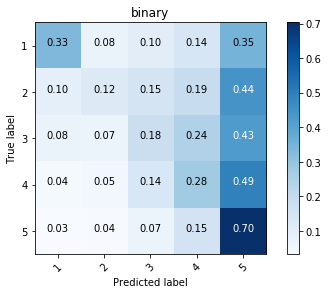

In [41]:
features = ['uid','pid']#,'time','nuser','nproduct']
y_train = X_train['Score'].get_values()
y_test  = X_test['Score'].get_values()

model = RandomForestClassifier()
model.fit(X_train[features], X_train['Score'])


t_train = model.predict(X_train[features])
t_test  = model.predict(X_test[features])

print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'RF classifier')

<p id='cd'></p>
### XGBClassifier
<a href='#title'>К оглавлению</a>


XGBClassifier - градиентный бустинг над решающими деревьями для классификации. 

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train
	MSE(mean)        1.4782
	MSE(prediction)  2.0786
	R2(prediction)    -0.4062
	confusion matrix
[[  435     0     0     5  3355]	
 [   62    92     0     8  3274]	
 [   30     0    31     9  6398]	
 [   41     0     0    73 11345]	
 [   47     1     0    18 33227]]
Normalized confusion matrix
[[1.14624506e-01 0.00000000e+00 0.00000000e+00 1.31752306e-03
  8.84057971e-01]
 [1.80442375e-02 2.67753201e-02 0.00000000e+00 2.32828871e-03
  9.52852154e-01]
 [4.63821892e-03 0.00000000e+00 4.79282622e-03 1.39146568e-03
  9.89177489e-01]
 [3.57797365e-03 0.00000000e+00 0.00000000e+00 6.37053844e-03
  9.90051488e-01]
 [1.41170817e-03 3.00363440e-05 0.00000000e+00 5.40654192e-04
  9.98017601e-01]]


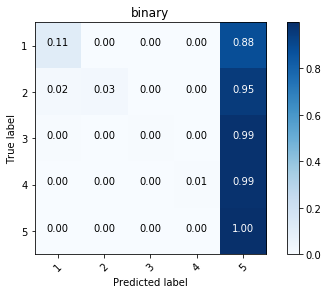


Test
	MSE(mean)        1.4875
	MSE(prediction)  2.1065
	R2(prediction)    -0.4161
	confusion matrix
[[  196     0     0     3  1441]	
 [   21    40     0     1  1431]	
 [   14     0    15     9  2814]	
 [   18     0     0    34  4878]	
 [   26     0     0     6 14104]]
Normalized confusion matrix
[[1.19512195e-01 0.00000000e+00 0.00000000e+00 1.82926829e-03
  8.78658537e-01]
 [1.40656397e-02 2.67916946e-02 0.00000000e+00 6.69792364e-04
  9.58472873e-01]
 [4.90883590e-03 0.00000000e+00 5.25946704e-03 3.15568022e-03
  9.86676017e-01]
 [3.65111562e-03 0.00000000e+00 0.00000000e+00 6.89655172e-03
  9.89452333e-01]
 [1.83927561e-03 0.00000000e+00 0.00000000e+00 4.24448217e-04
  9.97736276e-01]]


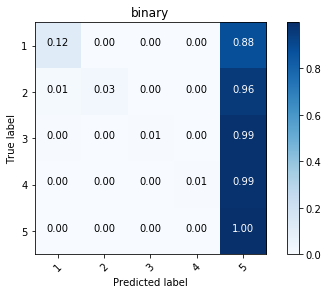

In [42]:
features = ['uid','pid']#,'time','nuser','nproduct']
y_train = X_train['Score'].get_values()
y_test  = X_test['Score'].get_values()

model = XGBClassifier()
model.fit(X_train[features], X_train['Score'])


t_train = model.predict(X_train[features])
t_test  = model.predict(X_test[features])

print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'XGBClassifier')

<p id='ce'></p>
### XGBRegressor
<a href='#title'>К оглавлению</a>


XGBClassifier - градиентный бустинг над решающими деревьями для регрессии. 

Train
	MSE(mean)        1.4782
	MSE(prediction)  1.2453
	R2(prediction)    0.1576
	confusion matrix
[[   22   572  1253  1948     0]	
 [    3   122   957  2354     0]	
 [    0    39  1362  5067     0]	
 [    0    52  1595  9812     0]	
 [    0    63  2466 30764     0]]
Normalized confusion matrix
[[5.79710145e-03 1.50724638e-01 3.30171278e-01 5.13306983e-01
  0.00000000e+00]
 [8.73108265e-04 3.55064028e-02 2.78521537e-01 6.85098952e-01
  0.00000000e+00]
 [0.00000000e+00 6.02968460e-03 2.10575139e-01 7.83395176e-01
  0.00000000e+00]
 [0.00000000e+00 4.53791779e-03 1.39191902e-01 8.56270181e-01
  0.00000000e+00]
 [0.00000000e+00 1.89228967e-03 7.40696242e-02 9.24038086e-01
  0.00000000e+00]]


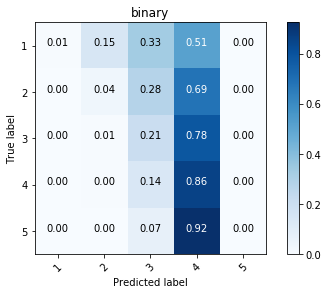


Test
	MSE(mean)        1.4875
	MSE(prediction)  1.2727
	R2(prediction)    0.1444
	confusion matrix
[[    9   223   541   867     0]	
 [    5    45   359  1084     0]	
 [    0    20   595  2237     0]	
 [    0    29   725  4176     0]	
 [    0    33  1090 13013     0]]
Normalized confusion matrix
[[0.0054878  0.13597561 0.32987805 0.52865854 0.        ]
 [0.00334896 0.03014066 0.24045546 0.72605492 0.        ]
 [0.         0.00701262 0.20862553 0.78436185 0.        ]
 [0.         0.00588235 0.14705882 0.84705882 0.        ]
 [0.         0.00233447 0.07710809 0.92055744 0.        ]]


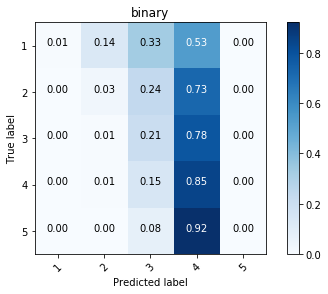

In [43]:
from xgboost import XGBRegressor
features = ['uid','pid']#,'time','nuser','nproduct']
y_train = X_train['Score'].get_values()
y_test  = X_test['Score'].get_values()

model = XGBRegressor()
model.fit(X_train[features], X_train['Score'])


t_train = model.predict(X_train[features])
t_test  = model.predict(X_test[features])

print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'XGBRegressor')

<p id='cf'></p>
### SVD
<a href='#title'>К оглавлению</a>


Чтобы предсказать оценку пользователя $𝑈$ для фильма $𝐼$, мы берем некоторый вектор $𝑝_𝑢$ (набор параметров) для данного пользователя и вектор для данного фильма $𝑞_𝑖$. Их скалярное произведение и будет нужным нам предсказанием. В нашей системе есть такая матрица, которая имеет много оценок от пользователей товарам. Мы надеемся предсказать оценку целевых пользователей для других неоцененных элементов. С его помощью мы можем по истории пользователей выявлять скрытые признаки объектов и интересы пользователей.
<img src="1.jpg">

In [44]:
from numpy import *
from scipy.sparse.linalg import svds
from numpy import linalg as la
def svdrec(table, factors= 150):
    UI = matrix(table)
    user_ratings_mean = mean(UI,axis=0)
    user_ratings_mean = user_ratings_mean.reshape(1,-1)
    UI_demeaned = UI - user_ratings_mean
    U,sigma,Vt = svds(UI_demeaned,factors)
    sigma = diag(sigma)
    pred_mat = dot(dot(U,sigma),Vt) + user_ratings_mean
    sc = MinMaxScaler(feature_range = (1,5))
    pred_mat = sc.fit_transform(pred_mat)
    return pred_mat

In [45]:
M_train = create_table_from_dataframe(X_train)
M_test  = create_table_from_dataframe(X_test)

predict_table = svdrec(M_train)
t_test, t_train = [], []

for pid, uid in data[data['OOS'] == False][['pid', 'uid']].get_values():
    t_train.append(predict_table[uid][pid])
for pid, uid in data[data['OOS'] == True][['pid', 'uid']].get_values():
    t_test.append(predict_table[uid][pid])

Train
	MSE(mean)        1.4782
	MSE(prediction)  1.0506
	R2(prediction)    0.2893
	confusion matrix
[[ 2524  1178    91     2     0]	
 [  230  2965   216    18     7]	
 [  110  2659  3604    68    27]	
 [  141  1828  7018  2352   120]	
 [  315  2693 11502 17551  1232]]
Normalized confusion matrix
[[6.65085639e-01 3.10408432e-01 2.39789196e-02 5.27009223e-04
  0.00000000e+00]
 [6.69383003e-02 8.62922002e-01 6.28637951e-02 5.23864959e-03
  2.03725262e-03]
 [1.70068027e-02 4.11100804e-01 5.57204700e-01 1.05132962e-02
  4.17439703e-03]
 [1.23047386e-02 1.59525264e-01 6.12444367e-01 2.05253513e-01
  1.04721180e-02]
 [9.46144835e-03 8.08878743e-02 3.45478028e-01 5.27167873e-01
  3.70047758e-02]]


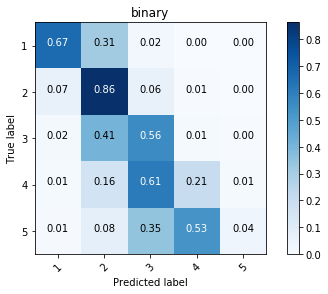


Test
	MSE(mean)        1.4875
	MSE(prediction)  3.4885
	R2(prediction)    -1.3452
	confusion matrix
[[1449  166   25    0    0]	
 [ 670  798   24    1    0]	
 [1025 1634  191    2    0]	
 [1616 1947 1322   43    2]	
 [3008 3081 5706 2311   30]]
Normalized confusion matrix
[[8.83536585e-01 1.01219512e-01 1.52439024e-02 0.00000000e+00
  0.00000000e+00]
 [4.48760884e-01 5.34494307e-01 1.60750167e-02 6.69792364e-04
  0.00000000e+00]
 [3.59396914e-01 5.72931276e-01 6.69705470e-02 7.01262272e-04
  0.00000000e+00]
 [3.27789047e-01 3.94929006e-01 2.68154158e-01 8.72210953e-03
  4.05679513e-04]
 [2.12790040e-01 2.17954160e-01 4.03650255e-01 1.63483305e-01
  2.12224109e-03]]


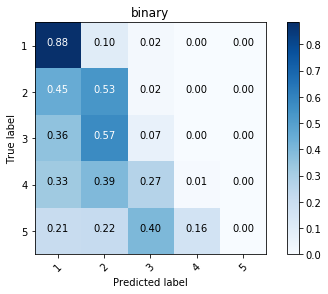

In [46]:
print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'SVD')

In [47]:
M_train = create_table_from_dataframe(data)
# M_test  = create_table_from_dataframe(X_test)

predict_table = svdrec(M_train)
t_test, t_train = [], []

for pid, uid in data[data['OOS'] == False][['pid', 'uid']].get_values():
    t_train.append(predict_table[uid][pid])
for pid, uid in data[data['OOS'] == True][['pid', 'uid']].get_values():
    t_test.append(predict_table[uid][pid])

Train
	MSE(mean)        1.4782
	MSE(prediction)  0.4771
	R2(prediction)    0.6772
	confusion matrix
[[ 3235   509    50     1     0]	
 [   74  3125   217    19     1]	
 [   74  1023  5275    84    12]	
 [  103  1040  3197  7045    74]	
 [  205  1495  2185 27989  1419]]
Normalized confusion matrix
[[8.52437418e-01 1.34123847e-01 1.31752306e-02 2.63504611e-04
  0.00000000e+00]
 [2.15366705e-02 9.09487776e-01 6.31548312e-02 5.52968568e-03
  2.91036088e-04]
 [1.14409400e-02 1.58163265e-01 8.15553494e-01 1.29870130e-02
  1.85528757e-03]
 [8.98856794e-03 9.07583559e-02 2.78994677e-01 6.14800593e-01
  6.45780609e-03]
 [6.15745052e-03 4.49043342e-02 6.56294116e-02 8.40687232e-01
  4.26215721e-02]]


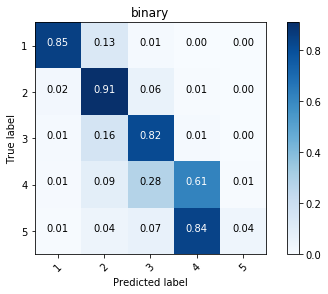


Test
	MSE(mean)        1.4875
	MSE(prediction)  0.4729
	R2(prediction)    0.6821
	confusion matrix
[[ 1367   249    23     1     0]	
 [   39  1348    96    10     0]	
 [   34   444  2330    35     9]	
 [   44   442  1367  3045    32]	
 [   77   635   921 11934   569]]
Normalized confusion matrix
[[8.33536585e-01 1.51829268e-01 1.40243902e-02 6.09756098e-04
  0.00000000e+00]
 [2.61219022e-02 9.02880107e-01 6.43000670e-02 6.69792364e-03
  0.00000000e+00]
 [1.19214586e-02 1.55680224e-01 8.16970547e-01 1.22720898e-02
  3.15568022e-03]
 [8.92494929e-03 8.96551724e-02 2.77281947e-01 6.17647059e-01
  6.49087221e-03]
 [5.44708546e-03 4.49207697e-02 6.51528014e-02 8.44227504e-01
  4.02518393e-02]]


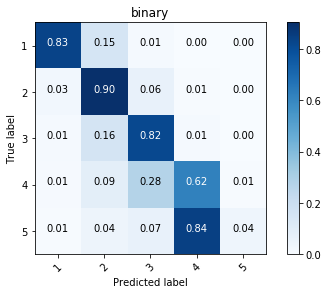

In [48]:
print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'SVD (full, not correct)')

<p id='cg'></p>
### Matrix factorization
<a href='#title'>К оглавлению</a>


Суть матричной факторизации заключается в создании двух новых матрицы скрытых факторов для пользователей и товаров, с размерами q*f и p*f, p и q -- общее число уникальных товаров и пользователей, f -- число скрытых факторов. Далее градиентным спуском проходим по всей исходной матрице оценок, изменяя соотвествующие параметры по формулам ниже, изменяя learning rate, пытаемся минимизировать функцию потерь L2. 
<img src="46ftTCS.png">

In [49]:
def MF (data, factors=30, maxIter=100, 
        LRate=0.02, GD_end=1e-3, regU = 0.01, 
        regI = 0.01):
    # latent matrix for user
    U = np.random.rand(total_u, factors) / 3
    # latent matrix for item
    I = np.random.rand(total_p, factors) / 3
    # initial y as the history of loss
    y = []
    # initial the iteration and last loss
    iteration = 0
    last_loss = 0
    while iteration < maxIter:
        loss = 0
        for i in range(data.shape[0]):
            # get the uid, pid and the score from every line
            u, p, s = data[i]
            # calculate the error
            error = s - np.dot(U[u], I[p])
            # calculate the loss function
            # avoid loss become to large, scale to 1/50
            loss += error ** 2 / 50
            # update the parameter according to the gradient descent
            pp = U[u]
            qq = I[p]
            U[u] += LRate *  (error * qq - regU * pp)
            I[p] += LRate * (error * pp - regI * qq)
        iteration += 1
        y.append(loss)
        delta_loss = last_loss - loss
        print('iter = {}, loss = {}, delta_loss = {}, LR = {}'.format(iteration, loss, delta_loss, LRate))
        # update the learn rate to make sure it will converge
        if abs(last_loss) > abs(loss):
            LRate *= 1.05
        else:
            LRate *= 0.5
        # When converge, stop the gradient descend
        if abs(delta_loss) < abs(GD_end):
            print('the diff in loss is {}, so the GD stops'.format(delta_loss))
            break
        last_loss = loss
    return U.dot(I.T)

In [50]:
data_simple_format = X_train[['uid', 'pid', 'Score']].get_values()
result = MF(data_simple_format, factors=30, maxIter=100, LRate=0.02, GD_end=1e-3)

iter = 1, loss = 4176.033679443046, delta_loss = -4176.033679443046, LR = 0.02
iter = 2, loss = 1216.5171316820679, delta_loss = 2959.516547760978, LR = 0.01
iter = 3, loss = 726.1569195386239, delta_loss = 490.36021214344396, LR = 0.0105
iter = 4, loss = 590.8890104636621, delta_loss = 135.26790907496184, LR = 0.011025000000000002
iter = 5, loss = 520.3920885509863, delta_loss = 70.49692191267582, LR = 0.011576250000000003
iter = 6, loss = 475.1966784485438, delta_loss = 45.19541010244245, LR = 0.012155062500000004
iter = 7, loss = 439.9537740879592, delta_loss = 35.242904360584646, LR = 0.012762815625000005
iter = 8, loss = 407.59739784776235, delta_loss = 32.35637624019682, LR = 0.013400956406250006
iter = 9, loss = 374.6092533331681, delta_loss = 32.98814451459424, LR = 0.014071004226562506
iter = 10, loss = 339.6932041431543, delta_loss = 34.91604919001384, LR = 0.014774554437890632
iter = 11, loss = 303.3044713840698, delta_loss = 36.38873275908446, LR = 0.015513282159785164
iter

Train
	MSE(mean)        1.4782
	MSE(prediction)  0.0022
	R2(prediction)    0.9985
	confusion matrix
[[ 3795     0     0     0     0]	
 [ 1704  1732     0     0     0]	
 [    0  3622  2846     0     0]	
 [    0     0  7389  4070     0]	
 [    0     0     0 24253  9040]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.49592549 0.50407451 0.         0.         0.        ]
 [0.         0.55998763 0.44001237 0.         0.        ]
 [0.         0.         0.64482066 0.35517934 0.        ]
 [0.         0.         0.         0.72847145 0.27152855]]


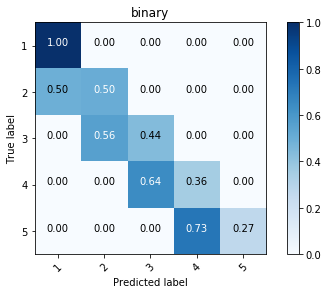


Test
	MSE(mean)        1.4875
	MSE(prediction)  0.3320
	R2(prediction)    0.7768
	confusion matrix
[[ 1391   103   102    37     7]	
 [  518   666   224    82     3]	
 [   21  1335  1230   251    15]	
 [   49   272  3034  1522    53]	
 [   22   194   789 10490  2641]]
Normalized confusion matrix
[[0.84817073 0.06280488 0.06219512 0.02256098 0.00426829]
 [0.34695244 0.44608171 0.15003349 0.05492297 0.00200938]
 [0.00736325 0.46809257 0.4312763  0.08800842 0.00525947]
 [0.00993915 0.05517241 0.61541582 0.30872211 0.01075051]
 [0.00155631 0.01372383 0.05581494 0.74207697 0.18682796]]


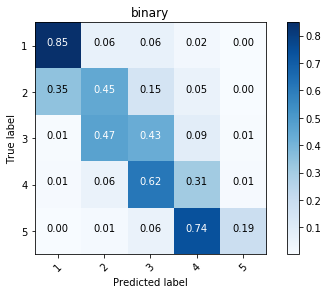

In [51]:
t_test, t_train = [], []

for pid, uid in data[data['OOS'] == False][['pid', 'uid']].get_values():
    t_train.append(result[uid][pid])
for pid, uid in data[data['OOS'] == True][['pid', 'uid']].get_values():
    t_test.append(result[uid][pid])
    
print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'Matrix factorization')

<p id='ch'></p>
### Probabilistic Matrix Factorization
<a href='#title'>К оглавлению</a>


<img src="5.png">
Процесс градиентного спуска такой же, как и у основного MF, однако ошибка вычислеятся по формуле выше. Результаты MF почти одинаковы с MF.

In [52]:
def PMF(data, factors=30, maxIter=100, 
        LRate=0.02, GD_end=1e-3, regU = 0.01, 
        regI = 0.01):
    
    U = np.random.rand(total_u, factors) / 3
    I = np.random.rand(total_p, factors) / 3
    y = []
    iteration = 0
    last_loss = 100
    while iteration < maxIter:
        loss = 0
        for i in range(data.shape[0]):
            u, p, s = data[i]
            error = s - np.dot(U[u], I[p])
            loss += error ** 2/50
            pp = U[u]
            qq = I[p]
            U[u] += LRate *  (error * qq - regU * pp)
            I[p] += LRate * (error * pp - regI * qq)
        loss += regU * (U * U).sum() + regI * (I * I).sum()
        iteration += 1
        y.append(loss)
        delta_loss = last_loss - loss
        print('iter = {}, loss = {}, delta_loss = {}, LR = {}'.format(iteration, loss, delta_loss, LRate))
        if abs(last_loss) > abs(loss):
            LRate *= 1.05
        else:
            LRate *= 0.5

        if abs(delta_loss) < abs(GD_end):
            print('the diff in loss is {}, so the GD stops'.format(delta_loss))
            break
        last_loss = loss
    return U.dot(I.T)

iter = 1, loss = 4411.732804244127, delta_loss = -4311.732804244127, LR = 0.02
iter = 2, loss = 1443.7055456153248, delta_loss = 2968.027258628802, LR = 0.01
iter = 3, loss = 961.1542493554608, delta_loss = 482.551296259864, LR = 0.0105
iter = 4, loss = 833.8236589667138, delta_loss = 127.33059038874705, LR = 0.011025000000000002
iter = 5, loss = 769.5909951670848, delta_loss = 64.232663799629, LR = 0.011576250000000003
iter = 6, loss = 729.3102546709957, delta_loss = 40.28074049608904, LR = 0.012155062500000004
iter = 7, loss = 698.1629671202309, delta_loss = 31.147287550764872, LR = 0.012762815625000005
iter = 8, loss = 669.5240474323596, delta_loss = 28.638919687871294, LR = 0.013400956406250006
iter = 9, loss = 640.1939528785911, delta_loss = 29.330094553768504, LR = 0.014071004226562506
iter = 10, loss = 609.0558920255048, delta_loss = 31.138060853086245, LR = 0.014774554437890632
iter = 11, loss = 576.5522074566, delta_loss = 32.50368456890487, LR = 0.015513282159785164
iter = 12

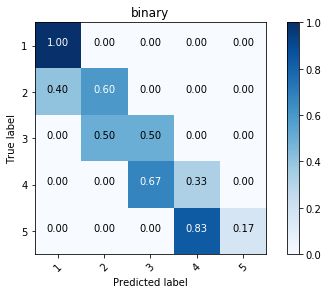


Test
	MSE(mean)        1.4875
	MSE(prediction)  0.3434
	R2(prediction)    0.7691
	confusion matrix
[[ 1358   134   102    38     8]	
 [  444   724   234    81    10]	
 [   30  1158  1358   269    37]	
 [   41   255  3041  1502    91]	
 [   29   165   781 11540  1621]]
Normalized confusion matrix
[[0.82804878 0.08170732 0.06219512 0.02317073 0.00487805]
 [0.29738781 0.48492967 0.15673141 0.05425318 0.00669792]
 [0.01051893 0.40603086 0.47615708 0.09431978 0.01297335]
 [0.00831643 0.05172414 0.6168357  0.30466531 0.01845842]
 [0.0020515  0.01167233 0.05524901 0.8163554  0.11467176]]


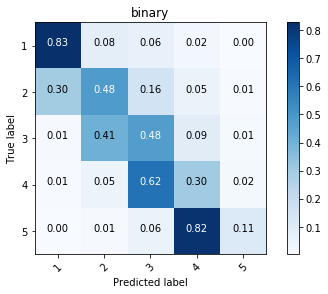

In [53]:
data_simple_format = X_train[['uid', 'pid', 'Score']].get_values()

result = PMF(data_simple_format, factors=30, maxIter=100, LRate=0.02, GD_end=1e-3)

t_test, t_train = [], []

for pid, uid in data[data['OOS'] == False][['pid', 'uid']].get_values():
    t_train.append(result[uid][pid])
for pid, uid in data[data['OOS'] == True][['pid', 'uid']].get_values():
    t_test.append(result[uid][pid])
    
print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'PMF')

<p id='da'></p>
### Таблица результатов
<a href='#title'>К оглавлению</a>


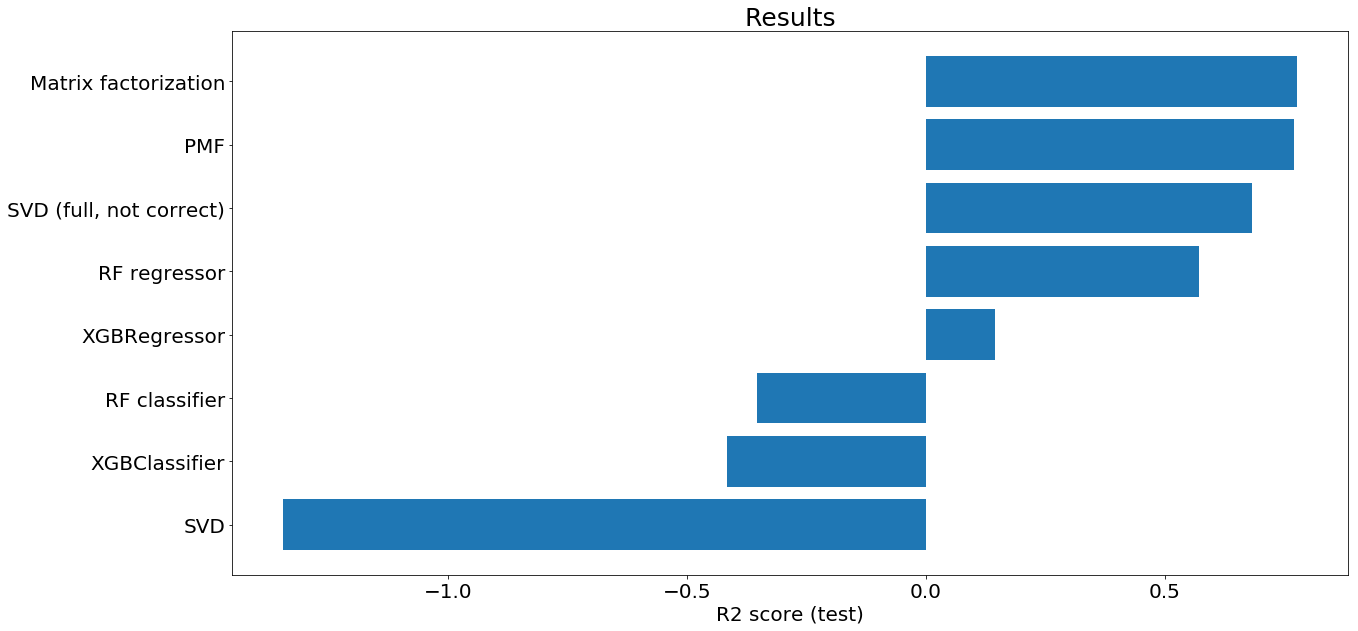

,r2(test),r2(train)
Matrix factorization,0.776802,0.998545
PMF,0.769143,0.998364
"SVD (full, not correct)",0.682090,0.677229
RF regressor,0.570072,0.927148
XGBRegressor,0.144435,0.157568
RF classifier,-0.353406,0.914634
XGBClassifier,-0.416093,-0.406172
SVD,-1.345153,0.289306


In [54]:
res = pd.DataFrame(results_final).T.sort_values('r2(test)')[::-1]#.ipynb_checkpoints/
# plt.boxplot(df)
# pd.DataFrame(results_final).T.sort_values('r2(test)')[::-1]#.ipynb_checkpoints/
plt.figure(figsize = (20, 10))
plt.title('Results', fontsize = 25)
plt.barh(range(len(res)), res['r2(test)'].get_values()[::-1])
plt.yticks(range(len(res)), res.index[::-1], fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('R2 score (test)', fontsize = 20)
plt.show()
res

<p id='db'></p>
### Итоги
<a href='#title'>К оглавлению</a>

Лучшие результаты были показаны при использовании двух матричных факторизаций, чуть хуже показала себя SVD на всех данных и RF Regressor. Все алгоритмы, которые обычно не используются для рекомендаций дают слабые результаты. SVD на обучающей выборке работает хуже всех.